# ------------------------------------------ OASIS INFOBYTE ------------------------------------------

# Name - Akash Prakash Mandlik

# Task1 - Iris Flower Classification


# Step-1) Business problem Understanding¶

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# Step-2) Data Understanding

In [2]:
# Dataset
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Step-3) Data Pre-processing

## 3.1) EDA

In [5]:
df["Species"].value_counts()

# it is a multiclass classification problem

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
df.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

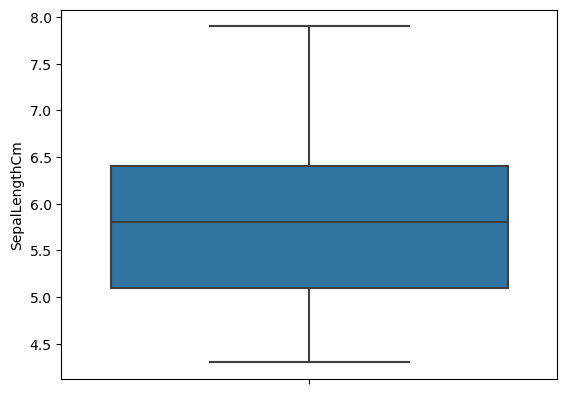

In [8]:
sns.boxplot(y = df["SepalLengthCm"])
plt.show()

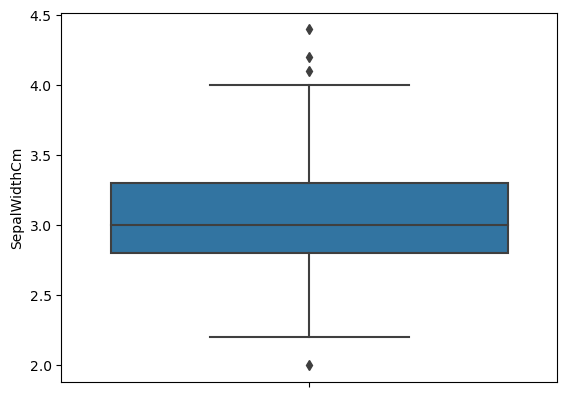

In [9]:
sns.boxplot(y = df["SepalWidthCm"])
plt.show()

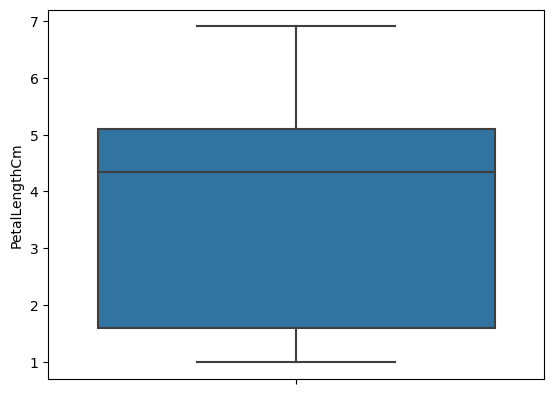

In [10]:
sns.boxplot(y = df["PetalLengthCm"])
plt.show()

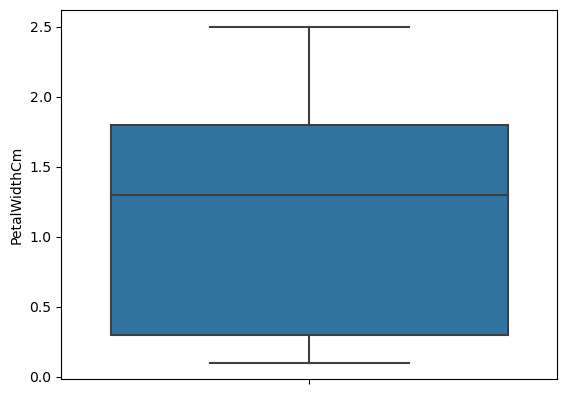

In [11]:
sns.boxplot(y = df["PetalWidthCm"])
plt.show()

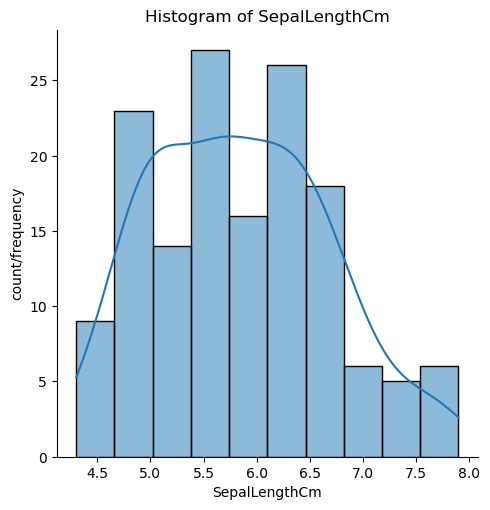

In [12]:
sns.displot(df["SepalLengthCm"], bins=10, kde=True)
plt.xlabel("SepalLengthCm")
plt.ylabel("count/frequency")
plt.title("Histogram of SepalLengthCm")
plt.show()

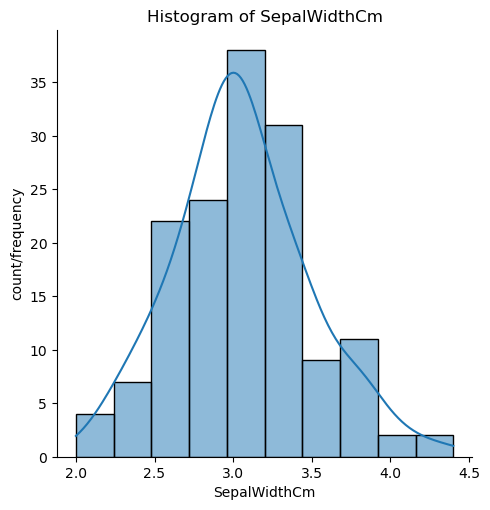

In [13]:
sns.displot(df["SepalWidthCm"], bins=10, kde=True)
plt.xlabel("SepalWidthCm")
plt.ylabel("count/frequency")
plt.title("Histogram of SepalWidthCm")
plt.show()

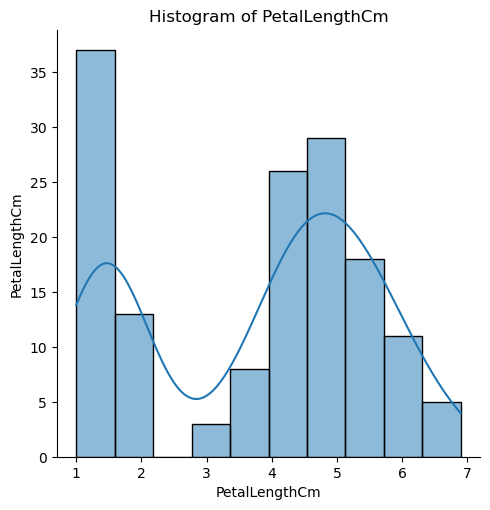

In [14]:
sns.displot(df["PetalLengthCm"], bins=10, kde=True)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalLengthCm")
plt.title("Histogram of PetalLengthCm")
plt.show()

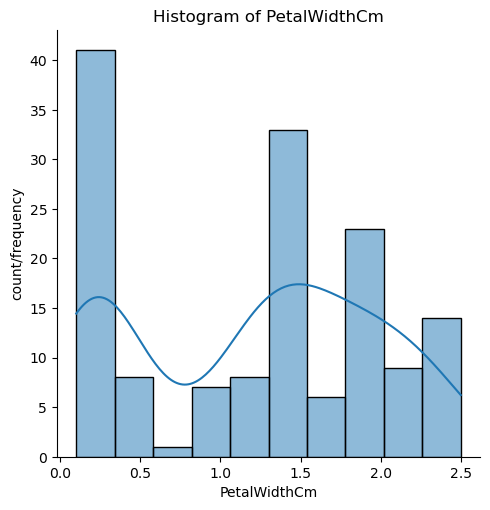

In [15]:
sns.displot(df["PetalWidthCm"], bins=10, kde=True)
plt.xlabel("PetalWidthCm")
plt.ylabel("count/frequency")
plt.title("Histogram of PetalWidthCm")
plt.show()

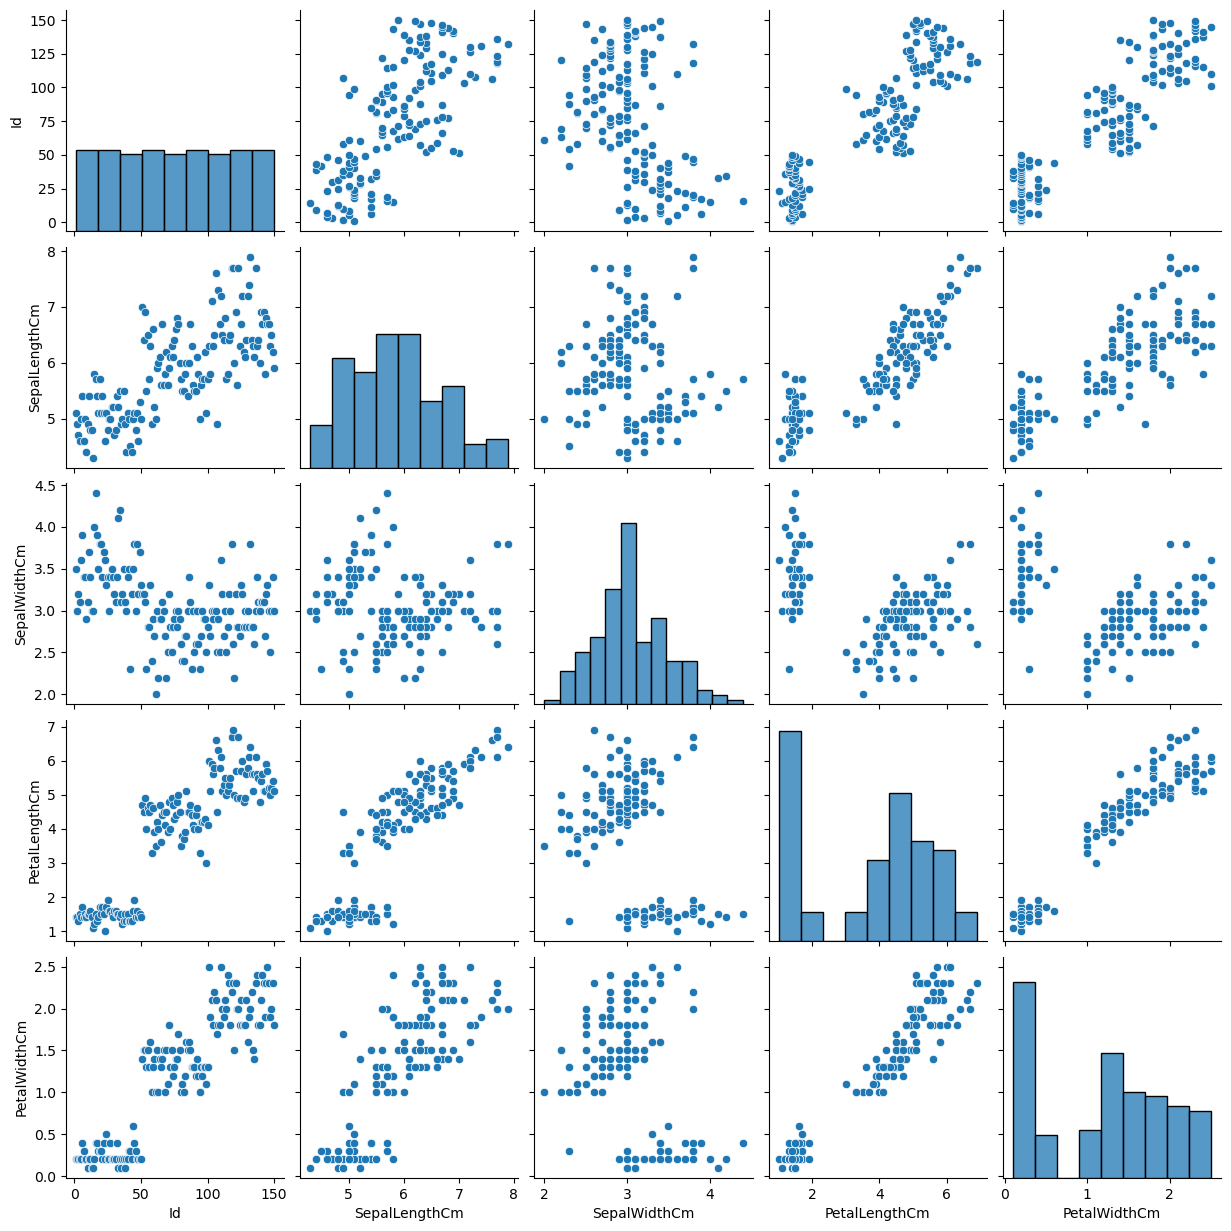

In [16]:
sns.pairplot(df)
plt.show()

In [17]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


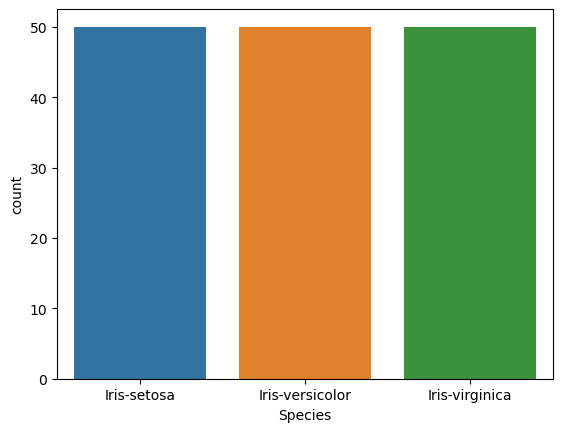

In [18]:
sns.countplot(x = df["Species"])
plt.show()

# 3.2) Data cleaning

### 3.2.1) Missing values

In [19]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### 3.2.2) Outliers

In [20]:
from feature_engine.outliers import Winsorizer

win = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['SepalWidthCm'])
df_win = win.fit_transform(df[['SepalWidthCm']])
df_win

print(win.left_tail_caps_ , win.right_tail_caps_)

{'SepalWidthCm': 2.05} {'SepalWidthCm': 4.05}


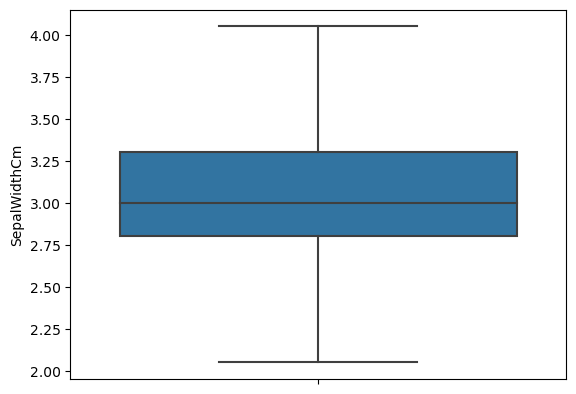

In [21]:
sns.boxplot(y= df_win["SepalWidthCm"])
plt.show()

## 3.3) Data Wrangling

### 3.3.1) Encoding

In [22]:
df["Species_enc"] = df["Species"].map({"Iris-setosa" : 0, "Iris-versicolor" : 1, "Iris-virginica" : 2})


In [23]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_enc
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [24]:
df = df.drop(columns = ["Id","Species"], axis=1)

In [25]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_enc
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
x = df.drop(columns='Species_enc')
y = df['Species_enc']

# X & Y Values

In [27]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species_enc, Length: 150, dtype: int64

## 3.4)Train-Test Split

In [29]:
### Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Step-4) Modeling

## 5) Decision Tree Classifier

In [31]:
#Modeling
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

#prediction
ypred_train = dt_model.predict(x_train)
ypred_test = dt_model.predict(x_test)

#evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy :",accuracy_score(y_train,ypred_train))   #Train accuracy
print("Test Accuracy :",accuracy_score(y_test,ypred_test))   #Test accuracy

#cross val score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_model,x,y,cv=5)

print(scores)
print("cross val score is:",scores.mean())

Train Accuracy : 1.0
Test Accuracy : 1.0
[0.96666667 0.96666667 0.9        1.         1.        ]
cross val score is: 0.9666666666666668


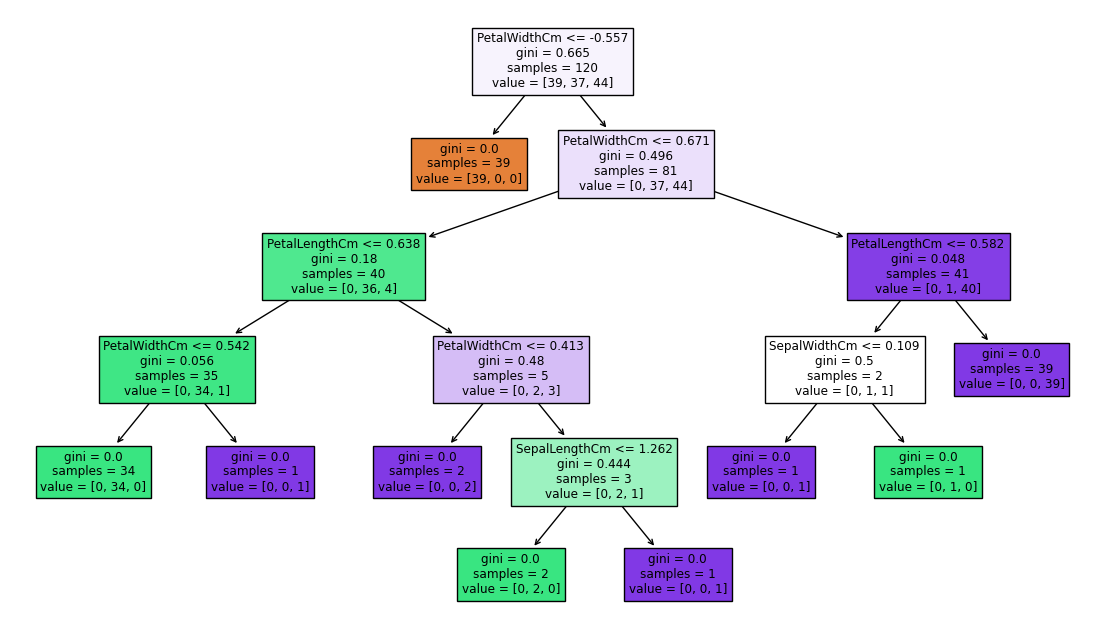

In [32]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8), dpi=100)
plot_tree(dt_model, filled=True, feature_names=x.columns)
plt.show()

In [33]:
dt_model.feature_importances_

array([0.01671193, 0.01253395, 0.04773381, 0.92302032])

## Confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

## Classification report

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [36]:
dt_model.predict([[6.7,3.0,5.2,2.3]])

array([2], dtype=int64)